## Types of Filters
### 1. Low-Pass Filter (LPF)

Allows low frequencies to pass, blocks high frequencies.

Use case: Removing high-frequency noise from EEG signals.

Example: Extracting Alpha (8-12 Hz) brain waves from EEG by removing high-frequency noise.

### 2. High-Pass Filter (HPF)

Allows high frequencies to pass, blocks low frequencies.

Use case: Removing slow drifts from IMU gait data.

Example: Removing baseline drift in ECG or EEG caused by movement artifacts.

### 3. Band-Pass Filter (BPF)

Allows only a specific frequency range to pass, blocks others.

Use case: Extracting Theta (4-7 Hz) waves from EEG.

Example: Detecting dementia-related Theta wave increase in EEG.

### 4. Band-Stop Filter (BSF) / Notch Filter

Blocks a specific frequency range, allows others to pass.

Use case: Removing powerline interference (50/60 Hz) from EEG.

Example: Removing 50 Hz noise from biomedical signals.

## Implementing Filters in Python

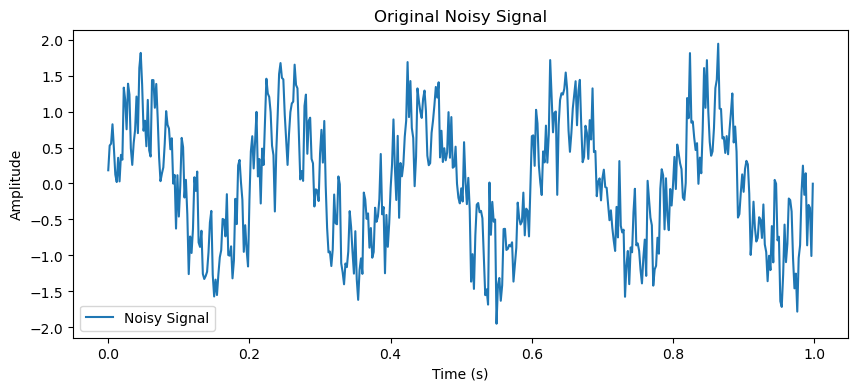

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, freqz

# Generate a signal with multiple frequencies
fs = 500  # Sampling rate in Hz
t = np.linspace(0, 1, fs, endpoint=False)
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 50 * t)  # 5 Hz + 50 Hz noise

# Add random noise
noisy_signal = signal + 0.3 * np.random.randn(len(t))

# Plot original noisy signal
plt.figure(figsize=(10, 4))
plt.plot(t, noisy_signal, label="Noisy Signal")
plt.title("Original Noisy Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

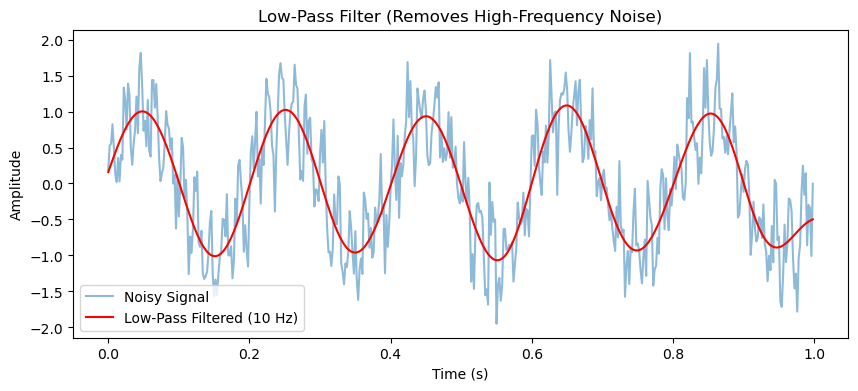

In [5]:
# Low-Pass Filter (LPF)

def butter_lowpass(cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Apply Low-Pass Filter (Cutoff: 10 Hz)
b, a = butter_lowpass(10, fs)
filtered_signal = filtfilt(b, a, noisy_signal)

# Plot result
plt.figure(figsize=(10, 4))
plt.plot(t, noisy_signal, alpha=0.5, label="Noisy Signal")
plt.plot(t, filtered_signal, label="Low-Pass Filtered (10 Hz)", color='red')
plt.title("Low-Pass Filter (Removes High-Frequency Noise)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

 Removes high-frequency noise (50 Hz) while preserving the 5 Hz component.

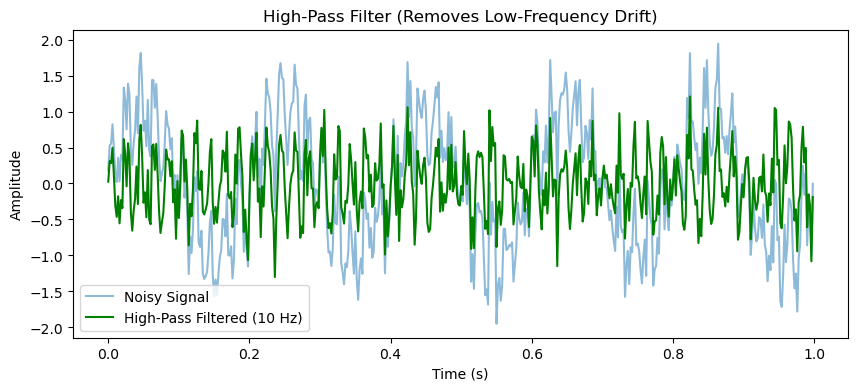

In [8]:
def butter_highpass(cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

# Apply High-Pass Filter (Cutoff: 10 Hz)
b, a = butter_highpass(10, fs)
filtered_signal = filtfilt(b, a, noisy_signal)

# Plot result
plt.figure(figsize=(10, 4))
plt.plot(t, noisy_signal, alpha=0.5, label="Noisy Signal")
plt.plot(t, filtered_signal, label="High-Pass Filtered (10 Hz)", color='green')
plt.title("High-Pass Filter (Removes Low-Frequency Drift)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

Removes slow drifts and preserves high-frequency components.

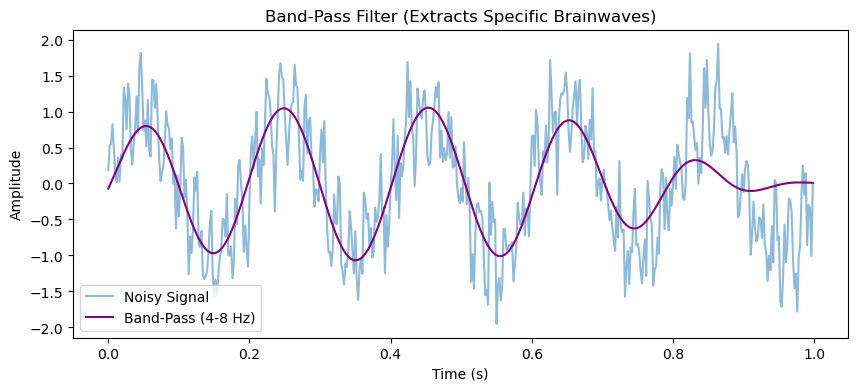

In [11]:
# Band-Pass Filter (BPF)

def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band', analog=False)
    return b, a

# Apply Band-Pass Filter (Keep 4-8 Hz)
b, a = butter_bandpass(4, 8, fs)
filtered_signal = filtfilt(b, a, noisy_signal)

# Plot result
plt.figure(figsize=(10, 4))
plt.plot(t, noisy_signal, alpha=0.5, label="Noisy Signal")
plt.plot(t, filtered_signal, label="Band-Pass (4-8 Hz)", color='purple')
plt.title("Band-Pass Filter (Extracts Specific Brainwaves)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

Extracts specific frequency bands, useful for EEG signal analysis!

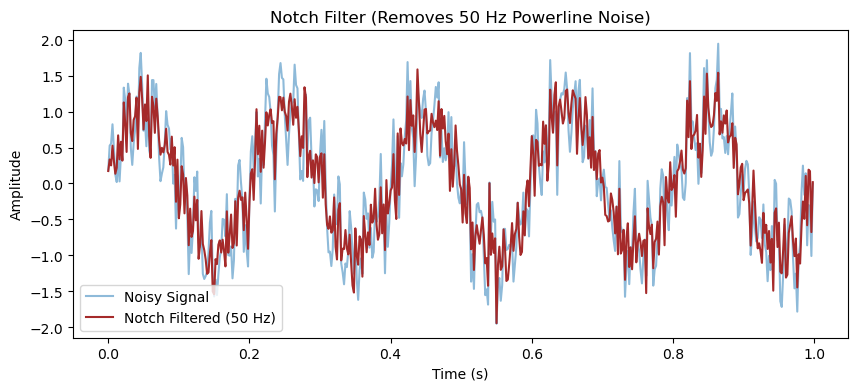

In [16]:
# Notch (Band-Stop) Filter

def butter_notch(cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = [cutoff - 1, cutoff + 1]  # Small bandwidth
    normal_cutoff = [c / nyquist for c in normal_cutoff]
    b, a = butter(order, normal_cutoff, btype='bandstop', analog=False)
    return b, a

# Apply Notch Filter (Remove 50 Hz Powerline Noise)
b, a = butter_notch(50, fs)
filtered_signal = filtfilt(b, a, noisy_signal)

# Plot result
plt.figure(figsize=(10, 4))
plt.plot(t, noisy_signal, alpha=0.5, label="Noisy Signal")
plt.plot(t, filtered_signal, label="Notch Filtered (50 Hz)", color='brown')
plt.title("Notch Filter (Removes 50 Hz Powerline Noise)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

## Real-Time Filtering on Streaming EEG & IMU Data

In [19]:
# Simulating Real-Time EEG & IMU Data Streaming

import numpy as np
import time

fs_eeg = 128  # EEG sampling rate (Hz)
fs_imu = 50   # IMU sampling rate (Hz)
duration = 10  # Total streaming time (seconds)

def simulate_eeg_signal():
    """Simulate real-time EEG streaming data."""
    t = np.linspace(0, 1, fs_eeg, endpoint=False)
    eeg_signal = np.sin(2 * np.pi * 10 * t) + 0.5 * np.sin(2 * np.pi * 4 * t)  # Alpha & Theta waves
    eeg_signal += 0.3 * np.random.randn(len(t))  # Add noise
    return eeg_signal

def simulate_imu_signal():
    """Simulate real-time IMU gait streaming data."""
    t = np.linspace(0, 1, fs_imu, endpoint=False)
    imu_signal = np.sin(2 * np.pi * 1.2 * t) + 0.2 * np.random.randn(len(t))  # Step pattern with noise
    return imu_signal

# Simulate real-time streaming for EEG & IMU
for i in range(duration):
    eeg_data = simulate_eeg_signal()
    imu_data = simulate_imu_signal()
    print(f"Time {i+1}s: Acquired {len(eeg_data)} EEG & {len(imu_data)} IMU samples")
    time.sleep(1)  # Simulate real-time delay

Time 1s: Acquired 128 EEG & 50 IMU samples
Time 2s: Acquired 128 EEG & 50 IMU samples
Time 3s: Acquired 128 EEG & 50 IMU samples
Time 4s: Acquired 128 EEG & 50 IMU samples
Time 5s: Acquired 128 EEG & 50 IMU samples
Time 6s: Acquired 128 EEG & 50 IMU samples
Time 7s: Acquired 128 EEG & 50 IMU samples
Time 8s: Acquired 128 EEG & 50 IMU samples
Time 9s: Acquired 128 EEG & 50 IMU samples
Time 10s: Acquired 128 EEG & 50 IMU samples


In [23]:
from scipy.signal import butter, filtfilt
import numpy as np
import time

def butter_bandpass(lowcut, highcut, fs, order=4):
    """Creates a band-pass filter."""
    nyquist = 0.5 * fs
    if lowcut <= 0 or highcut >= nyquist:
        raise ValueError("Cutoff frequencies must be between 0 and Nyquist frequency.")
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_notch(cutoff, fs, order=4):
    """Creates a notch filter to remove specific frequency (e.g., 50 Hz powerline noise)."""
    nyquist = 0.5 * fs
    if cutoff <= 0 or cutoff >= nyquist:
        raise ValueError("Cutoff frequency must be between 0 and Nyquist frequency.")
    normal_cutoff = [cutoff - 1, cutoff + 1]  # Small bandwidth
    normal_cutoff = [c / nyquist for c in normal_cutoff]
    b, a = butter(order, normal_cutoff, btype='bandstop')
    return b, a

# Apply Filters
def filter_signal(signal, fs, filter_type):
    """Applies a selected filter to EEG/IMU data."""
    if filter_type == "bandpass":
        b, a = butter_bandpass(4, 30, fs)  # Band-pass filter (4-30 Hz for EEG)
    elif filter_type == "notch":
        b, a = butter_notch(50, fs)  # Notch filter to remove 50 Hz noise
    return filtfilt(b, a, signal)

# Simulate real-time filtering
duration = 10  # Example duration
fs_eeg = 256  # Example sampling frequency for EEG
fs_imu = 256  # Example sampling frequency for IMU

def simulate_eeg_signal():
    return np.random.rand(256)  # Replace with actual EEG data simulation

def simulate_imu_signal():
    return np.random.rand(256)  # Replace with actual IMU data simulation

for i in range(duration):
    eeg_data = simulate_eeg_signal()
    imu_data = simulate_imu_signal()

    # Apply filters
    eeg_filtered = filter_signal(eeg_data, fs_eeg, "bandpass")
    imu_filtered = filter_signal(imu_data, fs_imu, "bandpass")

    print(f"Time {i+1}s: Applied Band-Pass Filter to EEG & IMU")
    time.sleep(1)

Time 1s: Applied Band-Pass Filter to EEG & IMU
Time 2s: Applied Band-Pass Filter to EEG & IMU
Time 3s: Applied Band-Pass Filter to EEG & IMU
Time 4s: Applied Band-Pass Filter to EEG & IMU
Time 5s: Applied Band-Pass Filter to EEG & IMU
Time 6s: Applied Band-Pass Filter to EEG & IMU
Time 7s: Applied Band-Pass Filter to EEG & IMU
Time 8s: Applied Band-Pass Filter to EEG & IMU
Time 9s: Applied Band-Pass Filter to EEG & IMU
Time 10s: Applied Band-Pass Filter to EEG & IMU


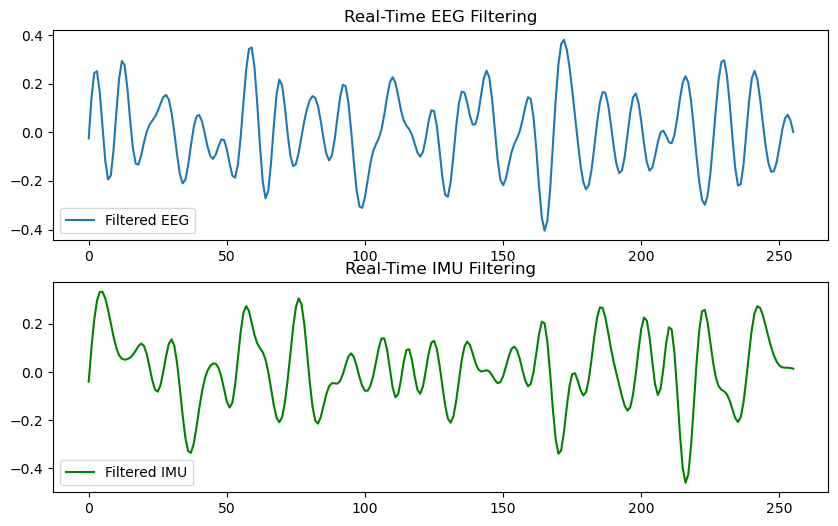

In [25]:
import matplotlib.pyplot as plt
from collections import deque

# Initialize real-time plot
plt.ion()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

# Data buffers
eeg_buffer = deque(maxlen=fs_eeg)  # Store last 1 sec of EEG data
imu_buffer = deque(maxlen=fs_imu)  # Store last 1 sec of IMU data

for i in range(duration):
    eeg_data = simulate_eeg_signal()
    imu_data = simulate_imu_signal()

    eeg_filtered = filter_signal(eeg_data, fs_eeg, "bandpass")
    imu_filtered = filter_signal(imu_data, fs_imu, "bandpass")

    # Update buffers
    eeg_buffer.extend(eeg_filtered)
    imu_buffer.extend(imu_filtered)

    # Update plots
    ax1.clear()
    ax1.plot(list(eeg_buffer), label="Filtered EEG")
    ax1.set_title("Real-Time EEG Filtering")
    ax1.legend()

    ax2.clear()
    ax2.plot(list(imu_buffer), label="Filtered IMU", color="green")
    ax2.set_title("Real-Time IMU Filtering")
    ax2.legend()

    plt.pause(0.1)  # Pause for real-time effect

plt.ioff()
plt.show()


In [27]:
import tensorflow as tf

# Load Pre-Trained CNN-LSTM Model
model = tf.keras.models.load_model("cnn_lstm_dementia_model.h5")

def extract_features(signal):
    """Computes statistical features from EEG/IMU signals."""
    return np.array([np.mean(signal), np.std(signal), np.max(signal), np.min(signal)]).reshape(1, -1)

# Real-Time Classification
for i in range(duration):
    eeg_data = simulate_eeg_signal()
    imu_data = simulate_imu_signal()

    eeg_filtered = filter_signal(eeg_data, fs_eeg, "bandpass")
    imu_filtered = filter_signal(imu_data, fs_imu, "bandpass")

    eeg_features = extract_features(eeg_filtered)
    imu_features = extract_features(imu_filtered)

    # Combine EEG & IMU Features
    input_features = np.hstack([eeg_features, imu_features]).reshape(1, 8, 1)

    # AI Prediction
    prediction = model.predict(input_features)
    label = "Dementia" if prediction > 0.5 else "Healthy"
    print(f"Time {i+1}s: Predicted {label} (Confidence: {prediction[0][0]:.2f})")

    time.sleep(1)

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'cnn_lstm_dementia_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)